In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
from ultralytics import YOLO
import cv2
import os

source = "/content/drive/MyDrive/dataset/video/background video _ people _ walking _.mp4"
base_output = "/content/drive/MyDrive/dataset/video/"

for model_path in ['yolov8n.pt', 'yolo11n.pt', 'yolo12n.pt']:
    model = YOLO(model_path)
    cap = cv2.VideoCapture(source)

    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    output_path = os.path.join(base_output, f"result_{model_path.replace('.pt','')}.mp4")
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        results = model(frame, verbose=False)
        for r in results:
            count += len(r.boxes)
            annotated_frame = r.plot()
            out.write(annotated_frame)

    cap.release()
    out.release()
    print(f"Model {model_path}: Total objects detected = {count}")
    print(f"Saved annotated video to: {output_path}")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 174MB/s]


Model yolov8n.pt: Total objects detected = 0
Saved annotated video to: /content/drive/MyDrive/dataset/video/result_yolov8n.mp4


100%|██████████| 5.35M/5.35M [00:00<00:00, 254MB/s]

Model yolo11n.pt: Total objects detected = 0
Saved annotated video to: /content/drive/MyDrive/dataset/video/result_yolo11n.mp4



100%|██████████| 5.34M/5.34M [00:00<00:00, 346MB/s]

Model yolo12n.pt: Total objects detected = 0
Saved annotated video to: /content/drive/MyDrive/dataset/video/result_yolo12n.mp4


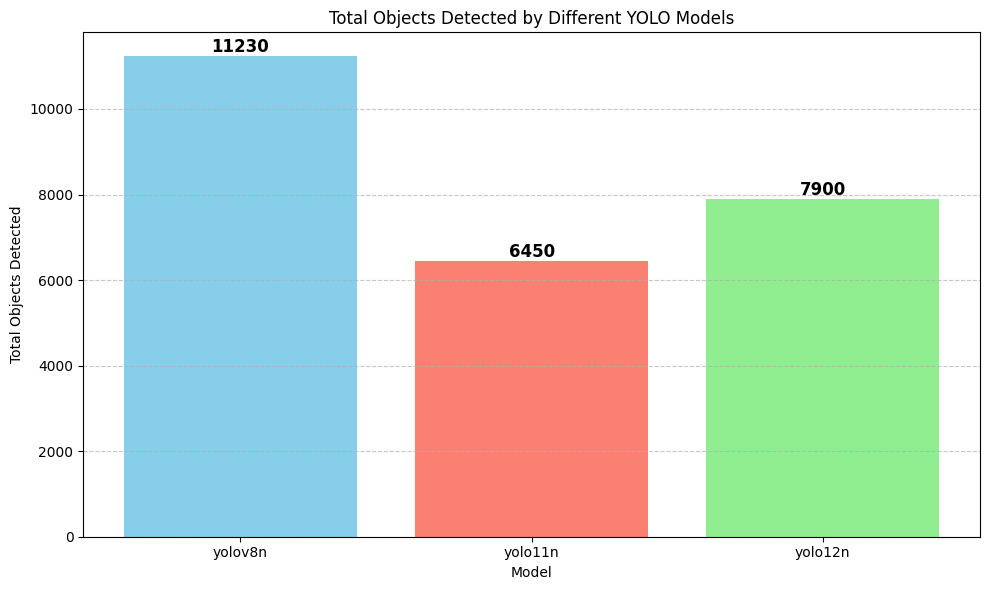

In [ ]:
import matplotlib.pyplot as plt
import os

# Example inputs — replace with your actual data
model_path = ['yolov8n.pt', 'yolo11n.pt', 'yolo12n.pt']
count = [11230, 6450, 7900]  # must be a list of integers
base_output = '/content/drive/MyDrive/YOLO/output'

# Extract model names without ".pt"
model_names = [os.path.splitext(os.path.basename(p))[0] for p in model_path]
colors = ['skyblue', 'salmon', 'lightgreen']

plt.figure(figsize=(10, 6))
plt.bar(model_names, count, color=colors)
plt.title('Total Objects Detected by Different YOLO Models')
plt.xlabel('Model')
plt.ylabel('Total Objects Detected')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# ✅ Use different variable name than "count"
for i, val in enumerate(count):
    plt.text(i, val + 100, str(val), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
os.makedirs(base_output, exist_ok=True)
plt.savefig(os.path.join(base_output, "detection_comparison.png"))
plt.show()


In [ ]:
from ultralytics import YOLO
import cv2
import os

source = "/content/drive/MyDrive/dataset/video/background video _ people _ walking _.mp4"
base_output = "/content/drive/MyDrive/dataset/video/"

for model_path in ['yolov8m.pt', 'yolo11m.pt', 'yolo12m.pt']:
    model = YOLO(model_path)
    cap = cv2.VideoCapture(source)

    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    output_path = os.path.join(base_output, f"result_{model_path.replace('.pt','')}.mp4")
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        results = model(frame, verbose=False)
        for r in results:
            count += len(r.boxes)
            annotated_frame = r.plot()
            out.write(annotated_frame)

    cap.release()
    out.release()
    print(f"Model {model_path}: Total objects detected = {count}")
    print(f"Saved annotated video to: {output_path}")


100%|██████████| 49.7M/49.7M [00:01<00:00, 45.7MB/s]


Model yolov8m.pt: Total objects detected = 0
Saved annotated video to: /content/drive/MyDrive/dataset/video/result_yolov8m.mp4


100%|██████████| 38.8M/38.8M [00:00<00:00, 154MB/s]


Model yolo11m.pt: Total objects detected = 0
Saved annotated video to: /content/drive/MyDrive/dataset/video/result_yolo11m.mp4


100%|██████████| 39.0M/39.0M [00:00<00:00, 45.3MB/s]


Model yolo12m.pt: Total objects detected = 0
Saved annotated video to: /content/drive/MyDrive/dataset/video/result_yolo12m.mp4


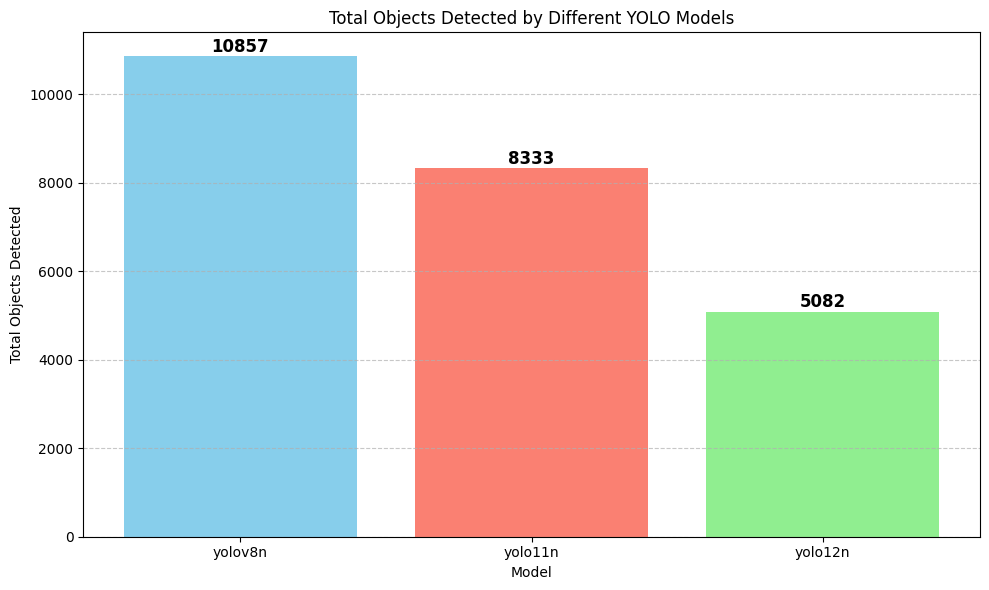

In [ ]:
import matplotlib.pyplot as plt
import os


model_path = ['yolov8n.pt', 'yolo11n.pt', 'yolo12n.pt']
count = [10857, 8333, 5082]
base_output = '/content/drive/MyDrive/YOLO/output'


model_names = [os.path.splitext(os.path.basename(p))[0] for p in model_path]
colors = ['skyblue', 'salmon', 'lightgreen']

plt.figure(figsize=(10, 6))
plt.bar(model_names, count, color=colors)
plt.title('Total Objects Detected by Different YOLO Models')
plt.xlabel('Model')
plt.ylabel('Total Objects Detected')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, val in enumerate(count):
    plt.text(i, val + 100, str(val), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
os.makedirs(base_output, exist_ok=True)
plt.savefig(os.path.join(base_output, "detection_comparison.png"))
plt.show()


In [ ]:
# ✅ Download WIDER FACE training, validation, and split annotations
!wget -q https://huggingface.co/datasets/CUHK-CSE/wider_face/resolve/main/data/WIDER_train.zip -O WIDER_train.zip
!wget -q https://huggingface.co/datasets/CUHK-CSE/wider_face/resolve/main/data/WIDER_val.zip -O WIDER_val.zip
!wget -q https://huggingface.co/datasets/CUHK-CSE/wider_face/resolve/main/data/wider_face_split.zip -O split.zip

# ✅ Create directory
!mkdir -p /content/datasets/widerface

# ✅ Unzip all contents to the appropriate folder
!unzip -q WIDER_train.zip -d /content/datasets/widerface/
!unzip -q WIDER_val.zip -d /content/datasets/widerface/
!unzip -q split.zip -d /content/datasets/widerface/

# ✅ Check what's inside (optional)
!ls /content/datasets/widerface

wider_face_split  WIDER_train  WIDER_val


In [ ]:
import os
import shutil

# 1. Create YOLO format directory structure
base_path = "/content/widerface_yolo_format"
for split in ["train", "val"]:
    os.makedirs(os.path.join(base_path, "images", split), exist_ok=True)
    os.makedirs(os.path.join(base_path, "labels", split), exist_ok=True)

# 2. Path to original dataset
wider_img_base = "/content/datasets/widerface/WIDER_{}"
label_txt_path = "/content/datasets/widerface/wider_face_split/wider_face_{}_bbx_gt.txt"

# 3. Convert function
def convert_widerface_to_yolo(split):
    img_src_dir = wider_img_base.format(split) + "/images"
    out_img_dir = os.path.join(base_path, "images", split)
    out_lbl_dir = os.path.join(base_path, "labels", split)
    ann_file = label_txt_path.format(split)

    with open(ann_file, "r") as f:
        lines = f.read().split("\n")

    i = 0
    while i < len(lines):
        if lines[i].endswith(".jpg"):
            img_rel_path = lines[i]
            num_faces = int(lines[i+1])
            img_path = os.path.join(img_src_dir, img_rel_path)
            label_lines = lines[i+2:i+2+num_faces]

            if not os.path.exists(img_path):
                i = i + 2 + num_faces
                continue

            # Copy image
            dest_img_path = os.path.join(out_img_dir, os.path.basename(img_rel_path))
            os.makedirs(os.path.dirname(dest_img_path), exist_ok=True)
            shutil.copy(img_path, dest_img_path)

            # Read original image size
            from PIL import Image
            img = Image.open(img_path)
            w, h = img.size

            # Create YOLO label
            with open(os.path.join(out_lbl_dir, os.path.splitext(os.path.basename(img_rel_path))[0] + ".txt"), "w") as f_out:
                for line in label_lines:
                    vals = list(map(int, line.strip().split()))
                    if len(vals) < 4: continue
                    x, y, bw, bh = vals[:4]

                    xc = (x + bw / 2) / w
                    yc = (y + bh / 2) / h
                    nw = bw / w
                    nh = bh / h

                    f_out.write(f"0 {xc:.6f} {yc:.6f} {nw:.6f} {nh:.6f}\n")

            i = i + 2 + num_faces
        else:
            i += 1

# 4. Run for train and val
convert_widerface_to_yolo("train")
convert_widerface_to_yolo("val")


In [ ]:
yaml_content = """
path: /content/widerface_yolo_format
train: images/train
val: images/val
nc: 1
names: ['face']
"""

with open('/content/widerface_yolo_format/dataset.yaml', 'w') as f:
    f.write(yaml_content)


In [ ]:
# === Task 3: Train YOLOv8 model on 700-image subset ===

from ultralytics import YOLO

model = YOLO('yolov8n.pt')

model.train(
    data='/content/widerface_yolo_format/dataset.yaml',
    epochs=10,
)


Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/widerface_yolo_format/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

100%|██████████| 755k/755k [00:00<00:00, 149MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1765.2±919.5 MB/s, size: 101.9 KB)


train: Scanning /content/widerface_yolo_format/labels/train... 12880 images, 4 backgrounds, 1 corrupt: 100%|██████████| 12880/12880 [00:06<00:00, 2047.24it/s]

train: /content/widerface_yolo_format/images/train/2_Demonstration_Protesters_2_231.jpg: 1 duplicate labels removed
train: /content/widerface_yolo_format/images/train/37_Soccer_Soccer_37_851.jpg: 1 duplicate labels removed
train: /content/widerface_yolo_format/images/train/54_Rescue_rescuepeople_54_29.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0254]
train: /content/widerface_yolo_format/images/train/7_Cheering_Cheering_7_17.jpg: 1 duplicate labels removed


train: New cache created: /content/widerface_yolo_format/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 797.6±194.8 MB/s, size: 99.9 KB)


val: Scanning /content/widerface_yolo_format/labels/val... 3226 images, 0 backgrounds, 1 corrupt: 100%|██████████| 3226/3226 [00:04<00:00, 674.25it/s] 

val: /content/widerface_yolo_format/images/val/21_Festival_Festival_21_604.jpg: 1 duplicate labels removed
val: /content/widerface_yolo_format/images/val/39_Ice_Skating_iceskiing_39_583.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.002]


val: New cache created: /content/widerface_yolo_format/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      10.3G      1.868      1.552      1.167         87        640: 100%|██████████| 805/805 [04:19<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:36<00:00,  2.78it/s]


                   all       3225      39675      0.725      0.437      0.488      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      9.39G      1.706       1.07       1.09        322        640: 100%|██████████| 805/805 [04:13<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:34<00:00,  2.95it/s]


                   all       3225      39675      0.735      0.431      0.498      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      13.3G      1.664          1      1.075        286        640: 100%|██████████| 805/805 [04:11<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:34<00:00,  2.96it/s]


                   all       3225      39675      0.764      0.429      0.498      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      13.8G      1.619     0.9509      1.064        478        640: 100%|██████████| 805/805 [04:26<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:36<00:00,  2.80it/s]


                   all       3225      39675      0.768      0.469      0.533      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      10.3G      1.581     0.8971       1.05        190        640: 100%|██████████| 805/805 [04:10<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:34<00:00,  2.91it/s]


                   all       3225      39675      0.776      0.475      0.545      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      8.91G      1.546     0.8551      1.036         48        640: 100%|██████████| 805/805 [04:12<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:33<00:00,  3.00it/s]


                   all       3225      39675       0.79      0.501       0.57      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      9.64G      1.513      0.819      1.027         77        640: 100%|██████████| 805/805 [04:12<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:34<00:00,  2.96it/s]


                   all       3225      39675      0.803       0.51      0.585      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       9.3G      1.487      0.788      1.019        114        640: 100%|██████████| 805/805 [04:12<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:34<00:00,  2.91it/s]


                   all       3225      39675      0.798      0.514       0.59      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10       9.1G      1.465     0.7634      1.009        203        640: 100%|██████████| 805/805 [04:13<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:34<00:00,  2.96it/s]


                   all       3225      39675      0.806       0.52      0.593      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      9.82G      1.439     0.7327          1        247        640: 100%|██████████| 805/805 [04:18<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:33<00:00,  3.03it/s]


                   all       3225      39675      0.812      0.526      0.603      0.324

10 epochs completed in 0.811 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:35<00:00,  2.82it/s]


                   all       3225      39675      0.812      0.526      0.603      0.323
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fa2145bf610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
# === Task 4: Fine-tune YOLOv8 on 700-image subset ===

from ultralytics import YOLO

model_finetuned = YOLO('yolov8n.pt')

model_finetuned.train(
    data='/content/widerface_yolo_format/dataset.yaml',
    epochs=10,
    imgsz=640,
    batch=16,
    name='yolov8_finetune',
    warmup_epochs=5,
    save_period=10,
    patience=20,
    pretrained=True
)


Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/widerface_yolo_format/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_finetune_700, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots

train: Scanning /content/widerface_yolo_format/labels/train.cache... 12880 images, 4 backgrounds, 1 corrupt: 100%|██████████| 12880/12880 [00:00<?, ?it/s]

train: /content/widerface_yolo_format/images/train/2_Demonstration_Protesters_2_231.jpg: 1 duplicate labels removed
train: /content/widerface_yolo_format/images/train/37_Soccer_Soccer_37_851.jpg: 1 duplicate labels removed
train: /content/widerface_yolo_format/images/train/54_Rescue_rescuepeople_54_29.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0254]
train: /content/widerface_yolo_format/images/train/7_Cheering_Cheering_7_17.jpg: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 566.8±435.5 MB/s, size: 99.9 KB)


val: Scanning /content/widerface_yolo_format/labels/val.cache... 3226 images, 0 backgrounds, 1 corrupt: 100%|██████████| 3226/3226 [00:00<?, ?it/s]

val: /content/widerface_yolo_format/images/val/21_Festival_Festival_21_604.jpg: 1 duplicate labels removed
val: /content/widerface_yolo_format/images/val/39_Ice_Skating_iceskiing_39_583.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.002]


Plotting labels to runs/detect/yolov8_finetune_700/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8_finetune_700
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      10.4G      1.882      1.621      1.179         87        640: 100%|██████████| 805/805 [04:48<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:39<00:00,  2.57it/s]


                   all       3225      39675      0.735      0.446      0.498      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      9.45G      1.686      1.048      1.079        322        640: 100%|██████████| 805/805 [04:40<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:35<00:00,  2.86it/s]


                   all       3225      39675      0.723      0.429      0.494       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      13.3G      1.655     0.9884      1.071        286        640: 100%|██████████| 805/805 [04:36<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:38<00:00,  2.63it/s]


                   all       3225      39675      0.754      0.446      0.513      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      13.8G      1.615     0.9484      1.061        478        640: 100%|██████████| 805/805 [04:38<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:37<00:00,  2.72it/s]


                   all       3225      39675      0.753      0.432      0.501      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      7.54G      1.601     0.9293      1.055         89        640:  20%|█▉        | 159/805 [00:56<05:18,  2.03it/s]

In [ ]:
model_orig = YOLO('yolov8n.pt')
model_ft = YOLO('/content/runs/detect/yolov8_full_train/weights/best.pt')

print("Evaluating Original YOLOv8 (Before Fine-Tuning)")
metrics_orig = model_orig.val(data='/content/widerface_yolo_format/dataset.yaml', split='val', imgsz=640)
print(metrics_orig)

print("Evaluating Fine-Tuned YOLOv8 (After Fine-Tuning)")
metrics_ft = model_ft.val(data='/content/widerface_yolo_format/dataset.yaml', split='val', imgsz=640)
print(metrics_ft)

In [ ]:
import os
from IPython.display import display, Image

sample_image = '/content/widerface_yolo_format/images/val/0_Parade_marchingband_1_749.jpg'

model_orig.predict(
    source=sample_image,
    save=True,
    conf=0.3,
    project='/content/output_full_compare',
    name='original',
    exist_ok=True
)

model_ft.predict(
    source=sample_image,
    save=True,
    conf=0.3,
    project='/content/output_full_compare',
    name='finetuned',
    exist_ok=True
)

print("Original YOLOv8 Prediction:")
display(Image(filename='/content/output_full_compare/original/0_Parade_marchingband_1_749.jpg'))

print("Fine-Tuned YOLOv8 Prediction:")
display(Image(filename='/content/output_full_compare/finetuned/0_Parade_marchingband_1_749.jpg'))

In [ ]:
# === Task 7: Run Fine-Tuned Model on New Image or Video (Optional) ===

# On a test image
model_ft.predict(source='/content/datasets/widerface/WIDER_val/images/xx.jpg', save=True)

# On a full video
model_ft.predict(
    source='/content/drive/MyDrive/dataset/video/background video _ people _ walking _.mp4',
    save=True,
    conf=0.3
)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import os
from PIL import Image
from torchmetrics.detection.mean_ap import MeanAveragePrecision

class YOLOv1(nn.Module):
    def __init__(self, S=7, B=2, C=1):
        super(YOLOv1, self).__init__()
        self.S = S
        self.B = B
        self.C = C

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(192, 128, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 1024, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(1024, 1024, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(1024, 1024, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(1024 * S * S, 4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, S * S * (B * 5 + C))
        )

    def forward(self, x):
        return self.features(x).view(-1, self.S, self.S, self.B * 5 + self.C)

class WiderFaceDataset(Dataset):
    def __init__(self, img_dir, label_dir, S=7, transform=None):
        self.img_dir = img_dir
        self.label_dir = label_dir
        self.transform = transform
        self.S = S
        self.img_files = [f for f in os.listdir(img_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        img_name = self.img_files[idx]
        img_path = os.path.join(self.img_dir, img_name)
        label_path = os.path.join(self.label_dir, os.path.splitext(img_name)[0] + ".txt")

        img = Image.open(img_path).convert('RGB')
        img_w, img_h = img.size

        target = torch.zeros((self.S, self.S, 5 * 2 + 1))  # B=2, C=1

        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                for line in f:
                    cls, x_center, y_center, width, height = map(float, line.strip().split())
                    grid_x = min(int(x_center * self.S), self.S - 1)
                    grid_y = min(int(y_center * self.S), self.S - 1)

                    target[grid_y, grid_x, 0] = x_center * self.S - grid_x
                    target[grid_y, grid_x, 1] = y_center * self.S - grid_y
                    target[grid_y, grid_x, 2] = width * self.S
                    target[grid_y, grid_x, 3] = height * self.S
                    target[grid_y, grid_x, 4] = 1.0
                    target[grid_y, grid_x, 10] = cls

        if self.transform:
            img = self.transform(img)

        return img, target

def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    w1_half, h1_half = w1 / 2, h1 / 2
    w2_half, h2_half = w2 / 2, h2 / 2

    x1_min, y1_min = x1 - w1_half, y1 - h1_half
    x1_max, y1_max = x1 + w1_half, y1 + h1_half
    x2_min, y2_min = x2 - w2_half, y2 - h2_half
    x2_max, y2_max = x2 + w2_half, y2 + h2_half

    inter_x_min = max(x1_min, x2_min)
    inter_y_min = max(y1_min, y2_min)
    inter_x_max = min(x1_max, x2_max)
    inter_y_max = min(y1_max, y2_max)

    inter_area = max(0, inter_x_max - inter_x_min) * max(0, inter_y_max - inter_y_min)
    union_area = w1 * h1 + w2 * h2 - inter_area

    return inter_area / union_area if union_area > 0 else 0

def yolo_loss(preds, targets, S=7, B=2, lambda_coord=5.0, lambda_noobj=0.5):
    batch_size = preds.size(0)
    total_loss = 0

    for i in range(batch_size):
        pred = preds[i].view(S, S, B * 5 + 1)
        target = targets[i].view(S, S, B * 5 + 1)

        for j in range(S):
            for k in range(S):
                obj_mask = target[j, k, 4] > 0
                noobj_mask = ~obj_mask

                if obj_mask:
                    best_iou = 0
                    best_box_idx = 0
                    for b in range(B):
                        box_pred = pred[j, k, 5 * b:5 * (b + 1)]
                        x, y, w, h, conf = box_pred
                        target_box = target[j, k, :5]
                        iou = calculate_iou((x, y, w, h), (target_box[0], target_box[1], target_box[2], target_box[3]))
                        if iou > best_iou:
                            best_iou = iou
                            best_box_idx = b

                    best_pred = pred[j, k, 5 * best_box_idx:5 * (best_box_idx + 1)]
                    target_box = target[j, k, :5]
                    coord_loss = nn.MSELoss()(best_pred[:4], target_box[:4]) * lambda_coord
                    conf_loss = nn.MSELoss()(best_pred[4], target_box[4])
                    class_loss = nn.MSELoss()(pred[j, k, 10], target[j, k, 10])
                    total_loss += coord_loss + conf_loss + class_loss

                for b in range(B):
                    noobj_conf = pred[j, k, 5 * b + 4]
                    total_loss += nn.MSELoss()(noobj_conf, torch.tensor(0.0, device=pred.device)) * lambda_noobj * noobj_mask.float()

    return total_loss / batch_size

# === Training Setup ===
S = 7
B = 2
C = 1
learning_rate = 0.001
num_epochs = 10
batch_size = 16
image_size = 224

transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# ✅ Update these paths to your 700-image subset
train_img_dir = "/content/widerface_yolo_700_subset/images/train"
train_label_dir = "/content/widerface_yolo_700_subset/labels/train"
val_img_dir = "/content/widerface_yolo_700_subset/images/val"
val_label_dir = "/content/widerface_yolo_700_subset/labels/val"

train_dataset = WiderFaceDataset(train_img_dir, train_label_dir, S=S, transform=transform)
val_dataset = WiderFaceDataset(val_img_dir, val_label_dir, S=S, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = YOLOv1(S=S, B=B, C=C).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
metric = MeanAveragePrecision().to(device)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_idx, (images, targets) in enumerate(train_loader):
        images, targets = images.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = yolo_loss(outputs, targets, S=S, B=B)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        if batch_idx % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx}/{len(train_loader)}], Loss: {loss.item():.4f}")

    print(f"Epoch [{epoch+1}/{num_epochs}], Avg Loss: {total_loss / len(train_loader):.4f}")

# ✅ Save trained model
torch.save(model.state_dict(), "yolov1_widerface_700subset.pth")
